In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [69]:
df = pd.read_csv('homeprices.csv')



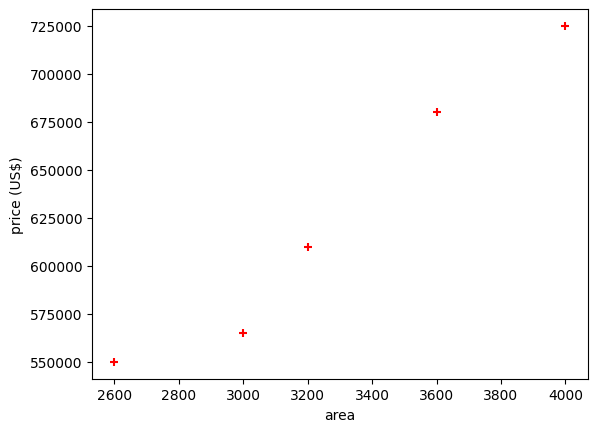

In [71]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price,color='red',marker ='+')

In [72]:

reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)




LinearRegression()

In [74]:
reg.predict([[5000]])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [60]:
reg.coef_

array([0.00107538])

In [68]:
reg.intercept_

np.float64(1972.6536140098344)

In [80]:
d = pd.read_csv('areas.csv')
d.head(3)

,area
0,1000
1,1500
2,2300


In [81]:
p = reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [84]:
d['prices'] = p 
d.to_csv('price_prediction.csv',index=False)

In [89]:
data_income = pd.read_csv('income.csv')
reg = linear_model.LinearRegression()
reg.fit(data_income[['year']],data_income.income)

predict = reg.predict([[2020]])
predict

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

Linear Regression Multiple Variables

In [105]:
home_price = pd.read_csv('homeprices.csv')
home_price

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [108]:
import math
median_bedrooms = math.floor(home_price['bedrooms'].median())
home_price.fillna(median_bedrooms , inplace=True)
home_price

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [109]:
reg = linear_model.LinearRegression()
reg.fit(home_price[['area','bedrooms','age']],home_price.price)

LinearRegression()

In [110]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [111]:
reg.intercept_

np.float64(221323.0018654043)

In [116]:
reg.predict([[5000,3,1]])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([848570.13390126])

In [117]:
hiring_data = pd.read_csv('hiring1.csv')
reg = linear_model.LinearRegression()

median_score = math.floor(hiring_data['test_score(out of 10)'].median())
hiring_data.fillna(median_score , inplace=True)
hiring_data


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,2,8.0,9,50000
1,2,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,7,8.0,7,72000
7,1,7.0,8,80000


In [118]:
reg.fit(hiring_data[['experience','test_score(out of 10)','interview_score(out of 10)']],hiring_data['salary($)'])

LinearRegression()

In [119]:
reg.predict([[2,9,6]])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55996.4388083])

In [120]:
reg.predict([[12,10,10]])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([82785.02562321])

exercise_answer


In [124]:
d = pd.read_csv("hiring.csv")
d.experience = d.experience.fillna("zero")
d.experience = d.experience.apply(w2n.word_to_num)
d['test_score(out of 10)'] = d['test_score(out of 10)'].fillna(median_test_score)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


### Gradient Descent and Cost Function

In [135]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.001
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val **2 for val in (y-y_predicted)])
        md = -(2/n) *sum(x*(y-y_predicted))
        bd = -(2/n) *sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {} , b{},cost {}, iteration{}".format(m_curr,b_curr,cost,i))
    
x = np.array([1,2,3,4,5,6,7])
y = np.array([8,9,10,11,12,13,14])



### Save Model Using Joblib And Pickle

In [138]:
hiring_data = pd.read_csv('hiring1.csv')
reg = linear_model.LinearRegression()

median_score = math.floor(hiring_data['test_score(out of 10)'].median())
hiring_data.fillna(median_score , inplace=True)
reg.fit(hiring_data[['experience','test_score(out of 10)','interview_score(out of 10)']],hiring_data['salary($)'])
reg.predict([[2,9,6]])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55996.4388083])

In [139]:
import pickle

In [142]:
with open('modal_pickle','wb') as f:
    pickle.dump(reg,f)

In [144]:
with open('modal_pickle','rb') as f:
   mp=  pickle.load(f)
mp.predict([[2,9,6]])


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55996.4388083])

In [147]:
import joblib

In [149]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [152]:
mp =joblib.load('model_joblib')
mp.predict([[1,2,3]])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50915.92113263])

### 5_one_hot_encoding

In [5]:
home_data = pd.read_csv('../data/homeprices.csv')
home_data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [13]:
dummies = pd.get_dummies(home_data.town , dtype = 'i')
merged = pd.concat([home_data,dummies],axis = 'columns')
final = merged.drop(['town', 'west windsor'] , axis = 'columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [16]:
model = linear_model.LinearRegression()
X = final.drop('price',axis = 'columns')
y = final.price
model.fit(X,y)

LinearRegression()

In [18]:
model.predict([[2800,0,1]])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [19]:
model.predict([[3400,0,0]])


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [20]:
model.score(X,y)

0.9573929037221872

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
dfle = home_data
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [30]:
X = dfle[['town','area']].values
y = dfle.price 


0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories=[0])
X = ohe.fit_transform(X).toarray()
X

TypeError: Sparse data was passed, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

### train_test_split

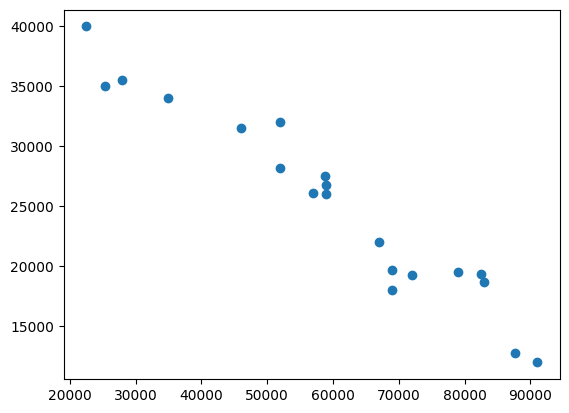

In [44]:
car_price = pd.read_csv('../data/carprices.csv')

plt.scatter(car_price['Mileage'],car_price['Sell Price($)'])

In [50]:
X = car_price[['Mileage','Age(yrs)']]
y = car_price[['Sell Price($)']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [51]:
model.predict(X_test)

array([[22340.52946228],
       [23066.79891662],
       [17939.42665064],
       [26216.65608002]])

In [53]:
model.score(X_test,y_test)

0.5075620200381423

### logistic_regression

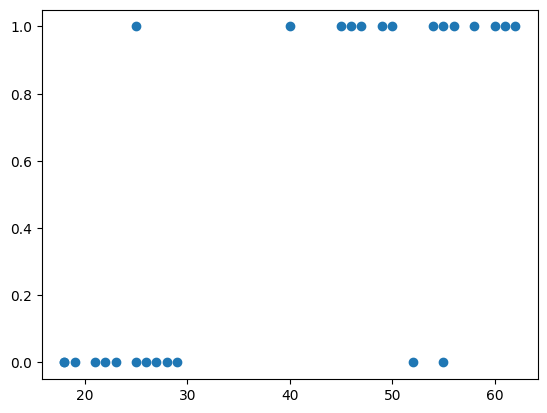

In [55]:
my_data = pd.read_csv('../data/insurance_data.csv')
plt.scatter(my_data['age'],my_data['bought_insurance'])

In [59]:
X_train , X_test, y_train,y_test = train_test_split(my_data[['age']],my_data[['bought_insurance']],test_size = 0.2)


,age
20,21
8,62
9,61
23,45
18,19
11,28


In [63]:
model  = linear_model.LogisticRegression()
model.fit(X_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [64]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 0])

In [65]:
model.score(X_test,y_test)

1.0

In [66]:
model.predict_proba(X_test)

array([[0.88948579, 0.11051421],
       [0.0626439 , 0.9373561 ],
       [0.06986656, 0.93013344],
       [0.32760336, 0.67239664],
       [0.91045567, 0.08954433],
       [0.78031575, 0.21968425]])

In [85]:

hr_data = pd.read_csv('../data/HR_comma_sep.csv')
left = hr_data[hr_data.left==1]
retained = hr_data[hr_data.left==0]




In [97]:
subdf = hr_data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary", dtype = 'i')
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.drop('salary',axis='columns',inplace=True)
X = df_with_dummies
y = hr_data.left
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0])

In [99]:
model.score(X_test,y_test)

0.7813333333333333

### Multiclass Classification

In [103]:
from sklearn.datasets import load_digits
digits = load_digits()

digits.data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

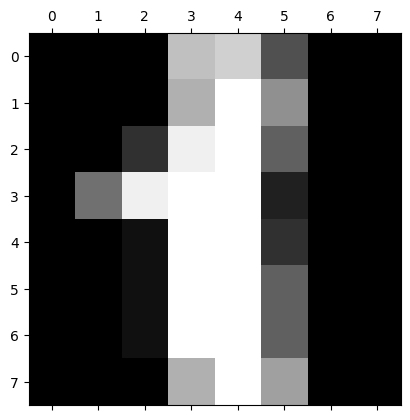

In [107]:
plt.gray()
plt.matshow(digits.images[1])

In [109]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [114]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.2)

In [126]:
model = linear_model.LogisticRegression() 
model.fit(X_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
model.score(X_test,y_test)

0.9694444444444444

In [132]:
model.predict([digits.data[9]])

array([9])

In [158]:

from sklearn.datasets import load_iris
image = load_iris()
X_train,X_test,y_train,y_test = train_test_split(image.data,image.target,test_size = 0.2)

model = linear_model.LogisticRegression() 
model.fit(X_train,y_train)
model.score(X_test,y_test)
model.predict([X_test])



ValueError: Found array with dim 3. LogisticRegression expected <= 2.

In [165]:
image = load_iris()
dir(image)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [167]:
image.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Decision Tree

In [2]:
my_salary = pd.read_csv('../data/salaries.csv')


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [6]:
inputs = my_salary.drop('salary_more_then_100k' ,axis = 'columns')
target = my_salary['salary_more_then_100k']



In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [13]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
target


0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [14]:
model = DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [15]:
model.score(inputs_n,target)

1.0

In [19]:
model.predict([[2,1,1]])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [48]:
titanic = pd.read_csv('../data/titanic.csv')
target = titanic['Survived']
sex_label = LabelEncoder()
sec_le = sex_label.fit_transform(titanic['Sex'])
data_t = titanic.drop(['PassengerId','Survived','Name','Sex','SibSp','Parch','Cabin','Embarked','Ticket'] , axis = 'columns')
data_t['Age'] = data_t['Age'].fillna(data_t.Age.mean())
data_t['Sex_label'] = sec_le



In [49]:
X_train,X_test ,y_train,y_test = train_test_split(data_t,target , test_size=0.2)
model =  DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [50]:
model.score(X_test,y_test)

0.8212290502793296

In [52]:
model.predict([[1,5,110,0]])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

### Support Vector Machine (SVM)

In [8]:
from sklearn.datasets import load_iris
image = load_iris()
dir(image)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
df = pd.DataFrame(image.data, columns = image.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['target'] = image.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df['flower_name'] = df.target.apply(lambda x : image.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


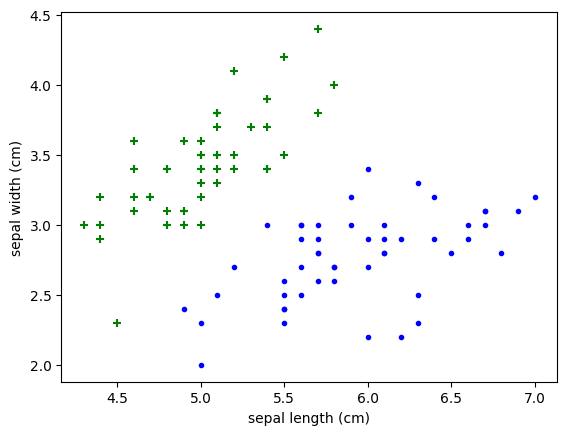

In [18]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green',marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'blue',marker = '.')

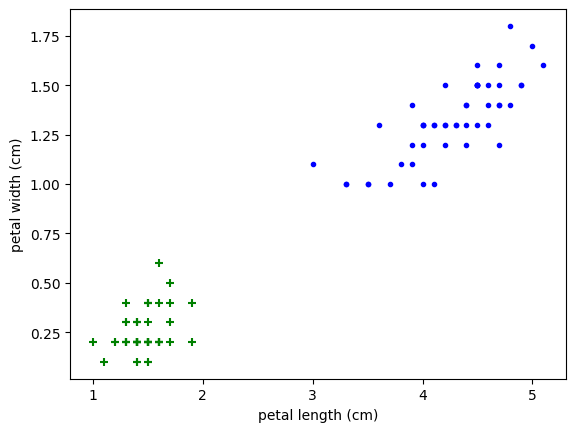

In [19]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green',marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue',marker = '.')

In [21]:
X= df.drop(['target','flower_name'],axis = 'columns')
y= df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
38,4.4,3.0,1.3,0.2
81,5.5,2.4,3.7,1.0
99,5.7,2.8,4.1,1.3
93,5.0,2.3,3.3,1.0
132,6.4,2.8,5.6,2.2
...,...,...,...,...
39,5.1,3.4,1.5,0.2
30,4.8,3.1,1.6,0.2
68,6.2,2.2,4.5,1.5
24,4.8,3.4,1.9,0.2


In [23]:
from sklearn.svm import SVC

In [26]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [27]:
model.score(X_test,y_test)

0.9666666666666667

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits
   )
digits.data


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [49]:
X_train ,X_test , y_train,y_test = train_test_split(digits.data,digits.target, test_size = 0.2)
model = SVC(kernel = 'poly')
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [52]:
model.predict([digits.data[8]])

array([8])

###  Random Forest

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits.data)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__

In [7]:
df = pd.DataFrame(digits.data)
df.head()
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
X = df.drop(['target'] ,axis = 'columns')
y = digits.target
X_train ,X_test , y_train,y_test = train_test_split(X,y, test_size = 0.2)



In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
model.score(X_test,y_test)

0.9777777777777777

In [21]:
y_predicted = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[34,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 33,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 25,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 39]])

### K Fold Cross Validation


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_digits

digits = load_digits()


In [24]:
X_train ,X_test , y_train,y_test = train_test_split(digits.data,digits.target, test_size = 0.2)

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9861111111111112

In [28]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9944444444444445

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9833333333333333

In [35]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [36]:
for train_index , test_index in kf.split([1,2,3,4,5,6,7,8]):
    print(train_index,test_index)

[3 4 5 6 7] [0 1 2]
[0 1 2 6 7] [3 4 5]
[0 1 2 3 4 5] [6 7]


In [40]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [41]:
get_score(LogisticRegression(),X_train ,X_test,y_train,y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9861111111111112

In [42]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 3)

In [48]:
scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [45]:
scores_logistic

[0.9215358931552587, 0.9415692821368948, 0.9165275459098498]

In [46]:
scores_svm

[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]

In [49]:
scores_rf

[0.9398998330550918, 0.9415692821368948, 0.9248747913188647]

In [50]:
from sklearn.model_selection import cross_val_score

In [52]:
cross_val_score(LogisticRegression(),digits.data,digits.target)
cross_val_score(SVC(),digits.data,digits.target)
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data,digits.target)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([0.92222222, 0.91944444, 0.94707521, 0.95264624, 0.92479109])

### Parameter tunning using k fold cross validation

In [53]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

np.float64(0.8770173805090007)

In [54]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

np.float64(0.9410117939168219)

In [55]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

np.float64(0.943780260707635)

## Exercise

In [57]:
from sklearn.datasets import load_iris
image = load_iris()
dir(image)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [69]:
df = pd.DataFrame(image.data, columns = image.feature_names)
df['target'] = image.target
X= df.drop(['target'] , axis = 'columns')
y= image.target

from sklearn.model_selection import cross_val_score


In [70]:
cross_val_score(LogisticRegression(),X,y , cv=10)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [78]:
np.average(cross_val_score(SVC(),X,y , cv=10))

np.float64(0.9733333333333334)

In [79]:
from sklearn.tree import DecisionTreeClassifier
np.average(cross_val_score(DecisionTreeClassifier(),X,y , cv=10))

np.float64(0.96)

In [80]:
np.average(cross_val_score(RandomForestClassifier(n_estimators=40),X,y , cv=10))

np.float64(0.9666666666666666)

# K Means Clustering Algorithm

In [2]:
df = pd.read_csv("../data/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


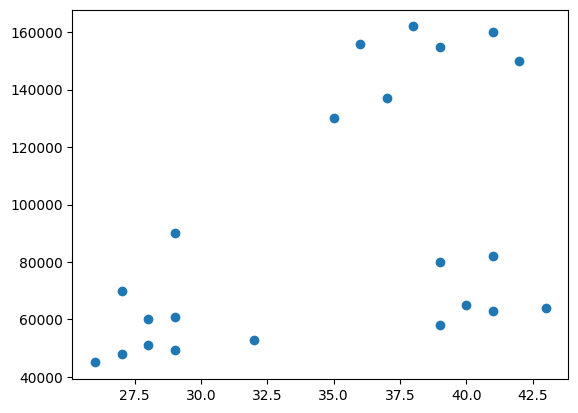

In [3]:
plt.scatter(df.Age,df['Income($)'])

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [10]:
df['cluster'] = y_predicted
df


,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


C:\Users\user\AppData\Local\Temp\ipykernel_14100\1333632795.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


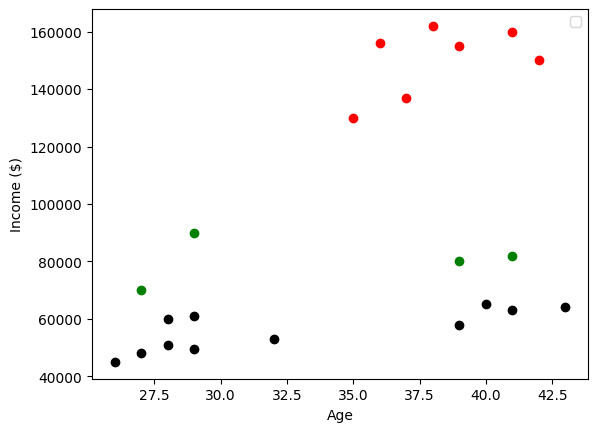

In [12]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]


plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [16]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [20]:
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_predicted
df


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


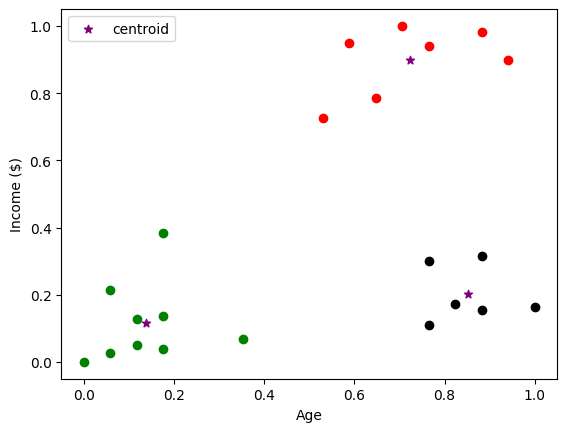

In [24]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]


plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [23]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

#### Elbow Plot

In [25]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

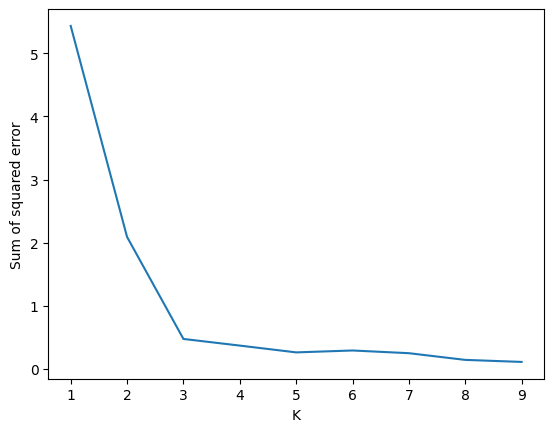

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [28]:
from sklearn.datasets import load_iris
image = load_iris()
df = pd.DataFrame(image.data,columns=image.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
df['flower'] = image.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)
df.head()

KeyError: "['sepal length (cm)', 'sepal width (cm)', 'flower'] not found in axis"